# 분류분석
군집화 완료된 결과(칼럼별)를     
분류분석에 학습시켜   
새로운 곡들을 받아올 때 이 분류모델을 적용시켜     
곡을 분류한다.    

In [1]:
library(party)
library(e1071)
library(caret)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: lattice
Loading required package: ggplot2


In [2]:
df <- read.csv('./20190305_clust_spotify_allsong_ver2.csv')

In [37]:
head(df)

X,artist_name,track_name,track_id,popularity,url,images,date,acousticness,danceability,⋯,clst_time_signature,clst_acousticness,clst_danceability,clst_energy,clst_instrumentalness,clst_liveness,clst_speechiness,clst_valence,clst_key,clst_category
0,Linkin Park,In The End,60a0Rd6pjrkxjPbaKzXjfq,83,https://open.spotify.com/track/60a0Rd6pjrkxjPbaKzXjfq,https://i.scdn.co/image/66ff51342a9b250bf5b998fd0ec8e977671468bc,2000-10-24,0.01030,0.542,⋯,0,0,1,2,0,0,0,0,0,1000010
1,3 Doors Down,Kryptonite,6ZOBP3NvffbU4SZcrnt1k6,78,https://open.spotify.com/track/6ZOBP3NvffbU4SZcrnt1k6,https://i.scdn.co/image/ea1bb526f0b9d2a3375427c70af845485f2c55c7,2000,0.00664,0.545,⋯,0,0,1,2,0,0,0,1,4,1000011
2,Eminem,The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,78,https://open.spotify.com/track/3yfqSUWxFvZELEM4PmlwIR,https://i.scdn.co/image/135ffbfeb47d564df36fdb4756c070b3ac32cd3b,2000-05-23,0.03390,0.950,⋯,0,0,2,1,0,0,0,1,2,1000021
3,OutKast,Ms. Jackson,0I3q5fE6wg7LIfHGngUTnV,77,https://open.spotify.com/track/0I3q5fE6wg7LIfHGngUTnV,https://i.scdn.co/image/48787c279dab6e8c1cc3b4beb27875ff37715fec,2000-10-31,0.14200,0.843,⋯,0,0,2,2,0,0,1,1,8,1001021
4,Coldplay,Yellow,3AJwUDP919kvQ9QcozQPxg,81,https://open.spotify.com/track/3AJwUDP919kvQ9QcozQPxg,https://i.scdn.co/image/495b0549379fc4c324445fd7d2bfa219a8c18a90,2000-07-10,0.00239,0.429,⋯,0,0,1,1,0,0,0,0,4,1200010
5,*NSYNC,Bye Bye Bye,62bOmKYxYg7dhrC6gH9vFn,72,https://open.spotify.com/track/62bOmKYxYg7dhrC6gH9vFn,https://i.scdn.co/image/b8c18208ed80713b9a3aff54125adecb4590ccae,2000-03-21,0.03100,0.610,⋯,0,0,1,2,0,0,0,1,1,1200011


In [6]:
library(randomForest)

In [69]:
df2 <- df['acousticness']
df2['clst_acousticness'] <- df['clst_acousticness']

In [70]:
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_acousticness ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [71]:
table(data.test$clst_acousticness, pred)
mean(data.test$clst_acousticness == pred) * 100

   pred
    -6.55729914811332e-13 -6.49229559002151e-13 -6.49172937627895e-13
  0                 14392                    51                     7
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.42754738322537e-13 -6.42738084977168e-13 -6.42655928473346e-13
  0                    51                    29                     8
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.36279917642924e-13 -6.36263264297554e-13 -6.2980509696331e-13
  0                    15                     7                    3
  1                     0                     0                    0
  2                     0                     0                    0
   pred
    -6.2978844361794e-13 -6.16856565827106e-13 -6.10359540687e-13
  0                    8                     6                 24


[1] 0


	 Conditional inference tree with 3 terminal nodes

Response:  clst_acousticness 
Input:  acousticness 
Number of observations:  118508 

1) acousticness <= 0.234; criterion = 1, statistic = 109238.236
  2)*  weights = 67722 
1) acousticness > 0.234
  3) acousticness <= 0.62; criterion = 1, statistic = 39508.187
    4)*  weights = 25393 
  3) acousticness > 0.62
    5)*  weights = 25393 

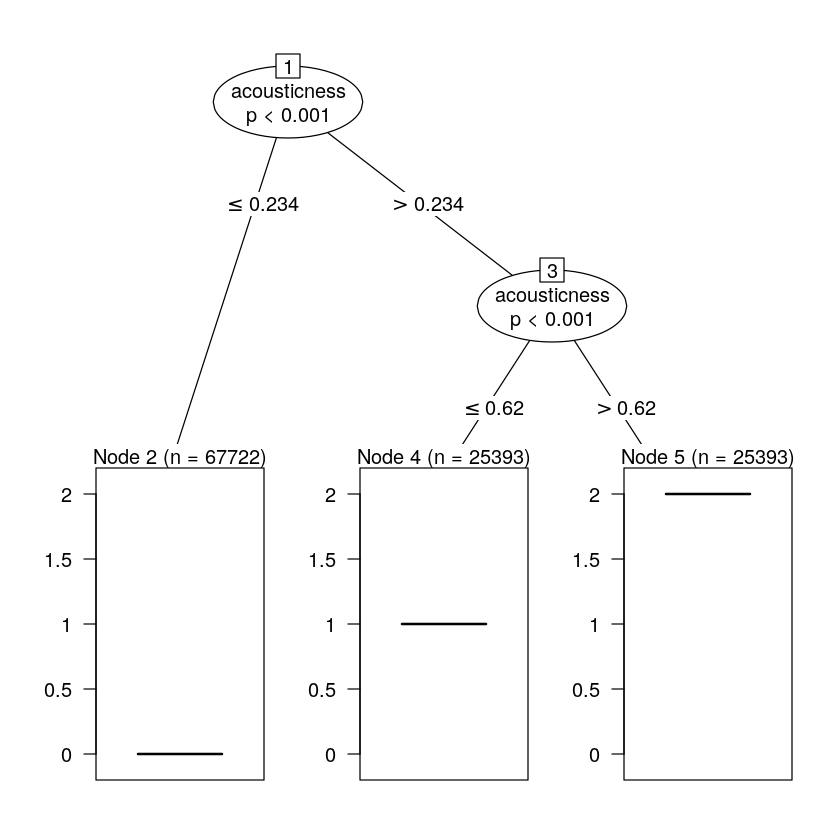

In [72]:
# model : ctree
acousticness_tree <- ctree(clst_acousticness ~ .,data=data.tr)
acousticness_tree
plot(acousticness_tree)

In [75]:
tt<- list(acousticness = 0.1514857) 
predict(rf, tt, type="class")

1 
-5.649214e-13

In [42]:
df2 <- df['danceability']
df2['clst_danceability'] <- df['clst_danceability']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_danceability ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [45]:
table(data.test$clst_danceability, pred)
mean(data.test$clst_danceability == pred) * 100

   pred
    -4.44089209850063e-16 -4.41868763800812e-16 -4.39648317751562e-16
  0                  3454                   583                   211
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -4.37427871702312e-16 -4.35207425653061e-16 -4.32986979603811e-16
  0                   179                   108                    55
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -4.30766533554561e-16 -4.2854608750531e-16 -4.2632564145606e-16
  0                    35                   56                   27
  1                     0                    0                    0
  2                     0                    0                    0
   pred
    -4.2410519540681e-16 -4.21884749357559e-16 -4.19664303308309e-16
  0                   19                    88                    4

[1] 0

In [55]:
# model : ctree
danceability_tree <- ctree(clst_danceability ~ .,data=data.tr)



	 Conditional inference tree with 3 terminal nodes

Response:  clst_danceability 
Input:  danceability 
Number of observations:  118508 

1) danceability <= 0.645; criterion = 1, statistic = 98350.843
  2) danceability <= 0.424; criterion = 1, statistic = 54026.515
    3)*  weights = 25548 
  2) danceability > 0.424
    4)*  weights = 52223 
1) danceability > 0.645
  5)*  weights = 40737 

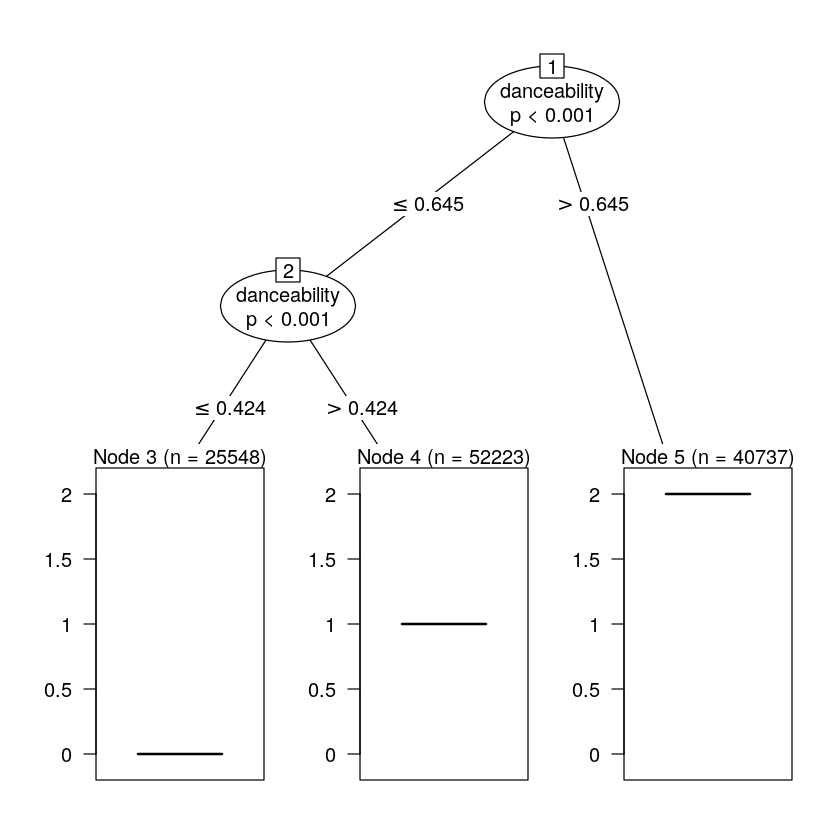

In [56]:
danceability_tree
plot(danceability_tree)

In [57]:
tt<- list(danceability = 0.9514857) 
predict(rf, tt, type="class")

1 
2

In [58]:
df2 <- df['energy']
df2['clst_energy'] <- df['clst_energy']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_energy ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [59]:
table(data.test$clst_energy, pred)
mean(data.test$clst_energy == pred) * 100

   pred
    -6.86317669362779e-14 -6.86029011376377e-14 -6.85984602455392e-14
  0                    63                    52                   310
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.82653933381516e-14 -6.82498502158069e-14 -6.82387479855606e-14
  0                    22                    15                    16
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.81876777264279e-14 -6.79145628623701e-14 -6.77635725310211e-14
  0                   242                     2                    61
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.75992595233765e-14 -6.75792755089333e-14 -6.7577055062884e-14
  0                    25                    41            

[1] 0


	 Conditional inference tree with 3 terminal nodes

Response:  clst_energy 
Input:  energy 
Number of observations:  118508 

1) energy <= 0.711; criterion = 1, statistic = 102012.106
  2) energy <= 0.401; criterion = 1, statistic = 49201.946
    3)*  weights = 22656 
  2) energy > 0.401
    4)*  weights = 45086 
1) energy > 0.711
  5)*  weights = 50766 

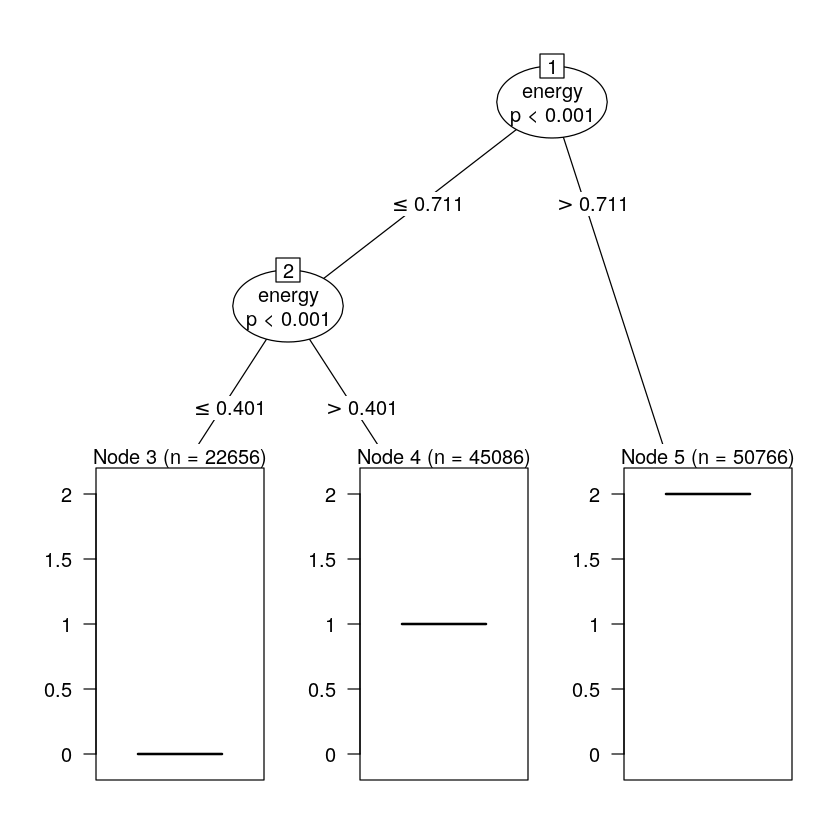

In [60]:
# model : ctree
energy_tree <- ctree(clst_energy ~ .,data=data.tr)
energy_tree
plot(energy_tree)

In [65]:
df2 <- df['instrumentalness']
df2['clst_instrumentalness'] <- df['clst_instrumentalness']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_instrumentalness ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [66]:
table(data.test$clst_instrumentalness, pred)
mean(data.test$clst_instrumentalness == pred) * 100

   pred
    -2.3037127760972e-14 -2.30365726494597e-14 -2.30360175379474e-14
  0                  806                  1103                    79
  1                    0                     0                     0
  2                    0                     0                     0
   pred
    -2.29888330594008e-14 -2.29877228363762e-14 -2.29855023903269e-14
  0                    70                    46                   232
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -2.29655183758837e-14 -2.29538610341251e-14 -2.29433139153912e-14
  0                    30                    92                    36
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -2.28977947713815e-14 -2.28539409619088e-14 -2.28422836201503e-14
  0                   202                    25               

[1] 0


	 Conditional inference tree with 3 terminal nodes

Response:  clst_instrumentalness 
Input:  instrumentalness 
Number of observations:  118508 

1) instrumentalness <= 0.213; criterion = 1, statistic = 115120.533
  2)*  weights = 99230 
1) instrumentalness > 0.213
  3) instrumentalness <= 0.636; criterion = 1, statistic = 15466.064
    4)*  weights = 5724 
  3) instrumentalness > 0.636
    5)*  weights = 13554 

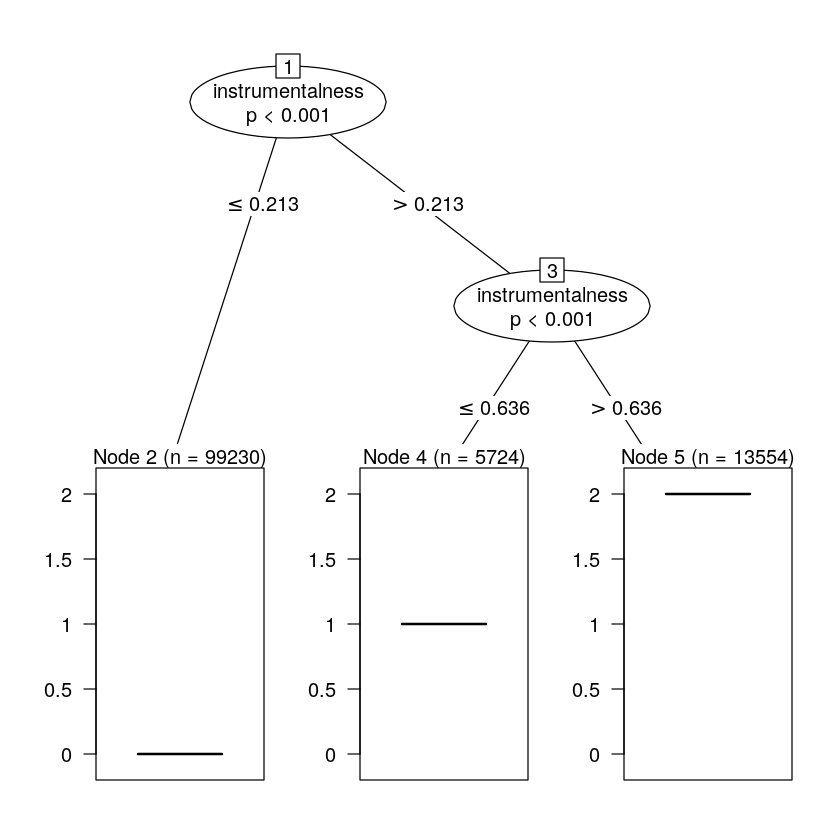

In [67]:
# model : ctree
instrumentalness_tree <- ctree(clst_instrumentalness ~ .,data=data.tr)
instrumentalness_tree
plot(instrumentalness_tree)

In [76]:
df2 <- df['liveness']
df2['clst_liveness'] <- df['clst_liveness']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_liveness ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [77]:
table(data.test$clst_liveness, pred)
mean(data.test$clst_liveness == pred) * 100

   pred
    -2.86853873987525e-14 -2.8398533524765e-14 -2.81116796507774e-14
  0                 47367                    2                     2
  1                     0                    0                     0
   pred
    -2.69642641548273e-14 -2.63905564068523e-14 -2.55299947848897e-14
  0                     2                     1                     1
  1                     0                     0                     0
   pred
    -1.5482476412032e-14 1.00000000000001
  0                    6                0
  1                    0             3410

[1] 0


	 Conditional inference tree with 2 terminal nodes

Response:  clst_liveness 
Input:  liveness 
Number of observations:  118508 

1) liveness <= 0.544; criterion = 1, statistic = 77383.461
  2)*  weights = 110641 
1) liveness > 0.544
  3)*  weights = 7867 

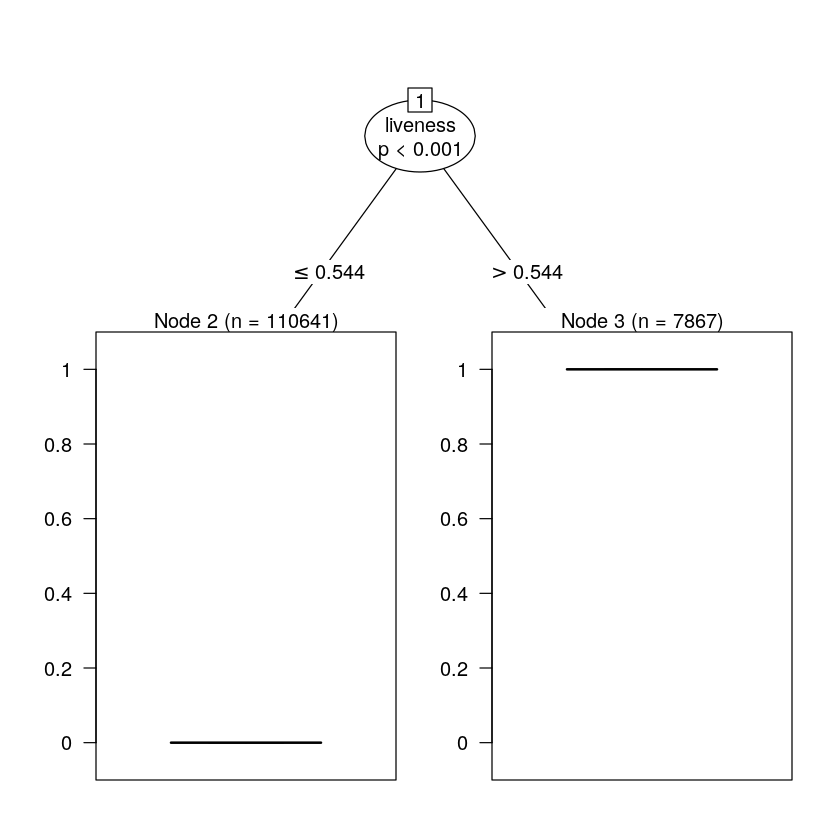

In [79]:
# model : ctree
liveness_tree <- ctree(clst_liveness ~ .,data=data.tr)
liveness_tree
plot(liveness_tree)

In [80]:
df2 <- df['speechiness']
df2['clst_speechiness'] <- df['clst_speechiness']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_speechiness ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [81]:
table(data.test$clst_speechiness, pred)
mean(data.test$clst_speechiness == pred) * 100

   pred
    -7.53841433720481e-14 -7.16149362034457e-14 -6.63380461674024e-14
  0                 43301                     3                     3
  1                     0                     0                     0
  2                     0                     0                     0
   pred
    -6.55842047336819e-14 -3.59709484420989e-14 1.0000000000002
  0                     1                    55               0
  1                     0                     0               1
  2                     0                     0               0
   pred
    1.00000000000024     2 2.00000000000001 2.00000000000002 2.00000000000003
  0                0     0                0                0                0
  1             6844     0                0                0                0
  2                0    73               30               17              463

[1] 0


	 Conditional inference tree with 3 terminal nodes

Response:  clst_speechiness 
Input:  speechiness 
Number of observations:  118508 

1) speechiness <= 0.17; criterion = 1, statistic = 94449.604
  2)*  weights = 100936 
1) speechiness > 0.17
  3) speechiness <= 0.578; criterion = 1, statistic = 13286.949
    4)*  weights = 16248 
  3) speechiness > 0.578
    5)*  weights = 1324 

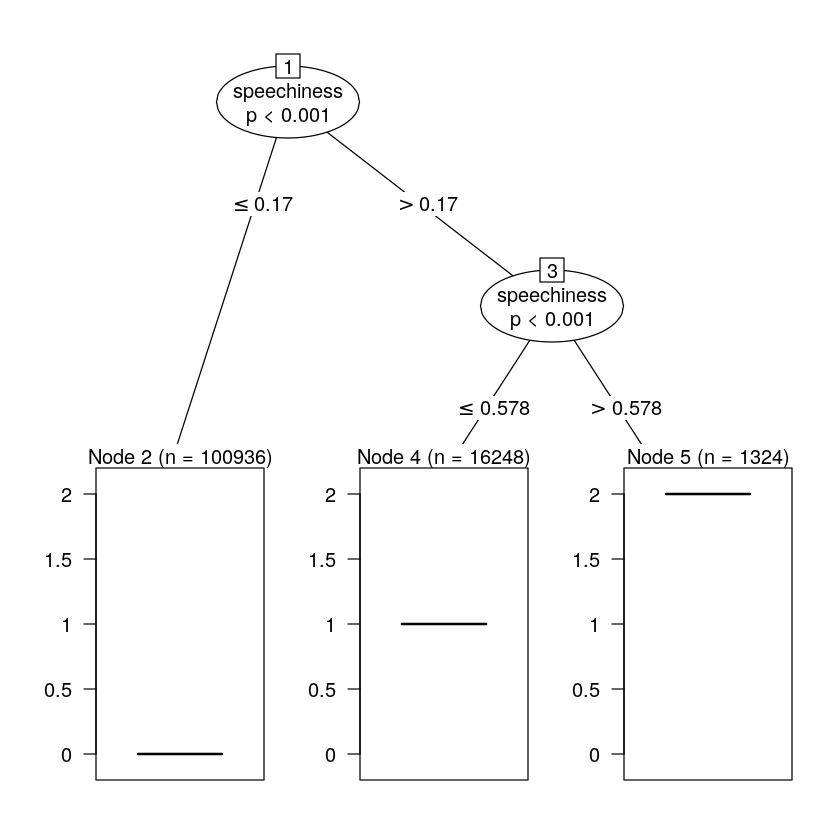

In [82]:
# model : ctree
speechiness_tree <- ctree(clst_speechiness ~ .,data=data.tr)
speechiness_tree
plot(speechiness_tree)

In [83]:
df2 <- df['valence']
df2['clst_valence'] <- df['clst_valence']
set.seed(1234)
samp <- c(sample(1:169298, 118508))
data.tr <- df2[samp,]
data.test <-  df2[-samp,]
rf <- randomForest(clst_valence ~ ., data=data.tr, ntree = 100)
pred <- predict(rf, data.test)

Warning message in randomForest.default(m, y, ...):
“The response has five or fewer unique values.  Are you sure you want to do regression?”

In [84]:
table(data.test$clst_valence, pred)
mean(data.test$clst_valence == pred) * 100

   pred
    -8.74439409770389e-14 -8.74428307540143e-14 -8.74395000849404e-14
  0                   102                    55                    63
  1                     0                     0                     0
   pred
    -8.74372796388911e-14 -8.74350591928419e-14 -8.74311734122557e-14
  0                    61                    50                    66
  1                     0                     0                     0
   pred
    -8.74267325201572e-14 -8.74217365165464e-14 -8.74200711820094e-14
  0                   148                    55                    49
  1                     0                     0                     0
   pred
    -8.74145200668863e-14 -8.74128547323494e-14 -8.74078587287386e-14
  0                    59                    61                    69
  1                     0                     0                     0
   pred
    -8.74006422790785e-14 -8.73895400488323e-14 -8.73795480416106e-14
  0                    61                   135   

[1] 0


	 Conditional inference tree with 2 terminal nodes

Response:  clst_valence 
Input:  valence 
Number of observations:  118508 

1) valence <= 0.493; criterion = 1, statistic = 85430.087
  2)*  weights = 62384 
1) valence > 0.493
  3)*  weights = 56124 

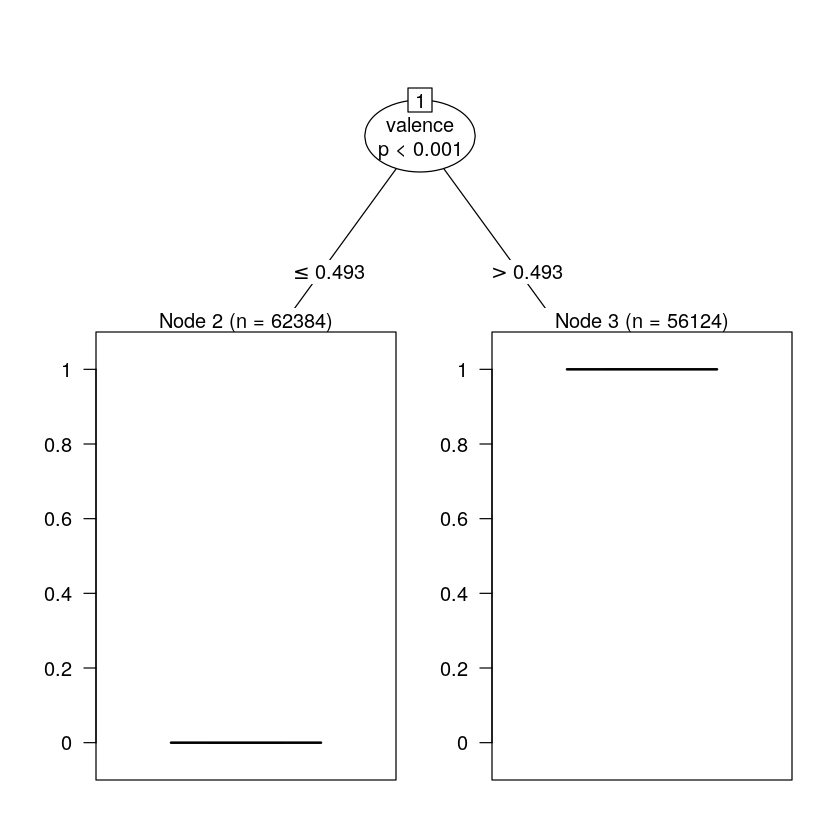

In [85]:
# model : ctree
valence_tree <- ctree(clst_valence ~ .,data=data.tr)
valence_tree
plot(valence_tree)